# Runge Kutta methods

In the last few exercises we explored Euler's method of finding numerical solutions to the Initial Value Problem:
 
$$\frac{dy}{dx}=f(x,y),\quad y(x_0)=y_0.$$
 
The method, giving us approximate function values $y_1^*,y_2^*,y_3^*,\ldots$, corresponding to a given set of points $x_1,x_2,x_3\ldots$ was summarized in the recurrent formula:
 
$$y_0^*=y_0,\quad y_k^*=y_{k-1}^*+f(x_{k-1},y_{k-1}^*)(x_{k}-x_{k-1}),\quad k=1,2,\ldots.$$
 
 
While being easy to understand (we use the derivative provided by $f$ and the estimated function value $y_{k-1}^*$ at one point to guess the value $y_k^*$ at the next point), Euler's method is however not very precise and often you will need very small step sizes $x_k-x_{k-1}$ to get reasonable accuracy.
 
Fortunately, there are better methods available. One commonly used family of methods are the Runge-Kutta methods. The basic idea behind these methods is the same as for Euler's method, but instead of only using the derivative value provided by $f$ at $(x_{k-1},y_{k-1}^*)$, these methods use weighted averages of values of $f$ *at a few different points near $(x_{k-1},y_{k-1}^*)$*. Exactly how and why this works, is outside the scope of this course, but feel free to look it up if you are interested (Googling "Runge-Kutta" should give you some info).

Below is a function `rk4` that applies a "fourth order" Runge-Kutta method to the initial value problem above. You can use it exactly like you use the `euler` function from your previous exercise. You don't have to understand how it works, but as mentioned above - feel free to look it up.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4(f,X,y0) :
    """The function 'rk4' takes three arguments:
    A function f of two variables, an array X of x-values and an initial y-value y0.
    It returns an array of corresponding y-values, starting with y0"""
    l = len(X)              
    y = np.zeros(l)         
    y[0] = y0               
    for k in range(1,l) :    
        h = X[k]-X[k-1]
        k1 = f(X[k-1],y[k-1])
        k2 = f(X[k - 1] + h / 2, y[k - 1] + k1 * h / 2)
        k3 = f(X[k - 1] + h / 2, y[k - 1] + k2 * h / 2)
        k4 = f(X[k - 1] + h, y[k - 1] + k3 * h)
        y[k] = y[k-1]+(k1+2*k2+2*k3+k4)/6*h
    return y              

## Exercise

In this exercise we will just use an example to illustrate the effectiveness of Runge-Kutta methods as compared to Euler's method. Let's consider again the i.v.p.
$$y'=y-x^2,\quad y(0)=1,$$
which we studied in the previous exercise. 

1. Take your function `euler` from the last exercise (you can copy and paste the function into a cell in this notebook) and use it to calculate an approximate solution for 7 equally spaced $x$-values from $0$ to $3$ (like we did in the last exercise).
2. Do the same again, but using `rk4` (provided above) instead of `euler`.
3. Plot both approximate solutions together with the exact solution, $$y(x)=x^2+2x+2-e^x,$$ all in the same plot. Use 1000 points for your plot of the exact solution.

Plot the exact solution in blue (control string `'b'`), the 7 point Euler approximation as green points joined by line segments (control string `'g.-'`), and the 7 point Runge-Kutta approximation as red points joined by line segments (control string `'r.-'`)

### To submit in LAMS.
Submit the plot (one plot with three graphs).

In [4]:
def sol(x) :
    return x**2+2*x+2-np.exp(x)

def f(x,y) :
    return y-x**2

def euler(f, X, y0) :
    """The function 'euler' takes three arguments:
    A function f of two variables, an array X of x-values and an initial y-value y0"""
    l = len(X)              # Let l be the length (number of entriess) of the array X. 
                            # Hence the first entry of X is X[0] and the
                            # last entry of X is X[l-1] .
    Y = np.zeros(l)         # Initialize Y to be an array of the same length as X 
                            # with all zero entries.
    Y[0] = y0               # Set the first entry of Y to be the initial value y0 .
    # Below, write a loop that for every integer k between 1 and l-1 
    # assigns the proper value to Y[k]  (based on Y[k-1], X[k-1] and X[k]).
    # This involves using the function f that was supplied as an argument to this function.
    # Recall that range(m,n) produces an iterable starting with m and ending with n-1.
    # Write your for-loop in the space below (before the return statement). You should only need two lines.
    
    for k in range(1,l):
        Y[k] = Y[k-1]+f(X[k-1],Y[k-1])*(X[k]-X[k-1])
    
    return Y                # Finally, return the array Y of approximate y-values.

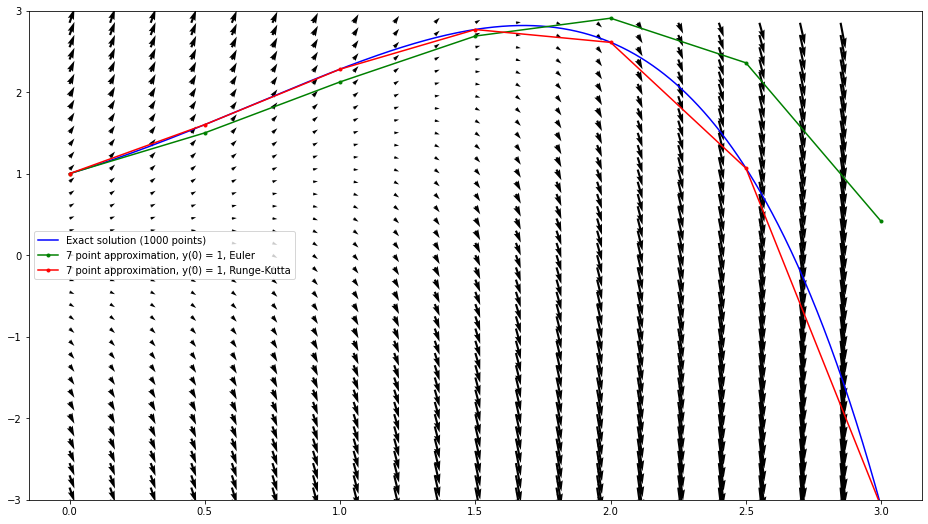

In [7]:
x = np.linspace(0,3,7)    # 1000 points

y1 = euler(f,x,1)

y2 = rk4(f,x,1)

xx = np.linspace(0,3,1000)
s = sol(xx) 

plt.figure(figsize=(16,9))

X,Y = np.meshgrid(np.arange(0,3,0.15),np.arange(-3,3,0.15))
plt.plot(xx,s,'b',label='Exact solution (1000 points)')
plt.plot(x,y1,'g.-',label='7 point approximation, y(0) = 1, Euler')
plt.plot(x,y2,'r.-',label='7 point approximation, y(0) = 1, Runge-Kutta')
plt.legend()

U = np.ones(np.shape(X))
V = f(X,Y)
plt.ylim(-3,3)
plt.quiver(X,Y,U,V)

plt.show()